# Question
The following figures show the Di Wang Tower in Shenzhen. The structure of Di Wang Tower is made up of steel and reinforced concrete (calculated as reinforced concrete), C terrain type, the design wind pressure $w_0 = 0.75 \text{ kN/m}^2$, period $T_1=6.38\text{ s}$, The first mode shape is listed in following table. To determine shape factor, the cross section could be considered as rectangle.

<center>
    <img src="./images/Diwang01.png" alt="The Elvation of the DiWang Tower" width="400"/>
    <img src="./images/Diwang02.png" alt="The Plan View of the DiWang Tower" width="400"/>
</center>

<br>

| $\dfrac{h}{H}$ | 0     | 0.1   | 0.2   | 0.3   | 0.4    | 0.5   | 0.6   | 0.7    | 0.8   | 0.9   | 1.0   |
| -------------- | ----- | ----- | ----- | ----- | ------ | ----- | ----- | ------ | ----- | ----- | ----- |
| Mode shape     | 0.0000| 0.0137| 0.0558| 0.1277| 0.2424| 0.3503| 0.4629| 0.5903| 0.7309| 0.8700| 1.0000| 
| Mass / ton     | 2500  | 2500  | 2500  | 2500  | 2500  | 2500  | 2500  | 2500  | 2500  | 2500  | 1500  | 

Only consider the first mode, calculate **the extreme of top displacements** induced by the along-wind static and dynamic wind load in the given wind direction using the following methods:
1. Method recommended by the Chinese code for wind-resistant design of buildings (GB 50009-2012).
2. According to the quasi-steady assumption, convert the fluctuating wind velocity time histories in `windData` (**with a duration of 10 minutes and a sampling frequency of 10 Hz**) to wind load time histories $F_i(t)=[1/2\rho \bar{u_i}^2+\rho \bar{u_i} u'_i(t)] \cdot \mu_{s,i} \cdot A_i$, and then using stocastic vibration methods in time domain (such as the newmark-beta algorithm) and in frequency domain (such as the response spectrum analysis). Peak factor $g = 2.5$ should be used for the extreme value calculation, and the programming using frequency domain method is optional.

# Answer


In [7]:
import scipy.io as sio

# load data
simDataPath = 'D:/WindData/windData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
Z = simData['Z']
dt = simData['dt']
t = simData['t']
del simData
print("\nThe dimension of U is:", U.shape)
print("\nThe dimension of Z is:", Z.shape)
print("\nThe dimension of t is:", t.shape)


The dimension of U is: (11, 6000)

The dimension of Z is: (11,)

The dimension of t is: (6000,)


In [71]:

import numpy as np
# 模态形状和质量
mode_shape = np.array([0.0000, 0.0137, 0.0558, 0.1277, 0.2424, 0.3503, 0.4629, 0.5903, 0.7309, 0.8700, 1.0000])
mass = np.array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 1500])
# 计算模态质量
modal_mass = np.sum(mass * mode_shape**2)
print("模态质量:", modal_mass)
# 总高度
total_height = 324.95
# 高度比
height_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 计算实际高度
actual_heights = [ratio * total_height for ratio in height_ratios]
# 计算风压高度变化系数的函数
def wind_pressure_coefficient(z):
    return 2.905 * (z / 450) ** 0.44
# 输出结果
print("高度比\t实际高度 (米)\t风压高度变化系数")
for ratio, height in zip(height_ratios, actual_heights):
    coefficient = wind_pressure_coefficient(height)
    print(f"{ratio:.1f}\t{height:.2f}\t\t{coefficient:.4f}")
print(f"{coefficient:.4f}")

import math
# 已知参数
zeta = 0.05  # 结构阻尼比
f1 = 1 / 6.38  # 结构第1阶自振频率（Hz）
kw = 0.54  # 地面粗糙度修正系数
w0 = 0.75  # 基本风压（KN/m^2）
# 计算 x1
x1 = (30 * f1) / math.sqrt(kw * w0)
# 计算 R
R = (math.pi / (6 * zeta) * (x1 ** 2) / (1 + x1 ** 2) ** (4 / 3)) ** 0.5
# 输出结果
print(f"x1 = {x1:.4f}")
print(f"R = {R:.4f}")


# 振型系数计算函数
def mode_shape_coefficient(z_over_H):
    return math.tan(math.pi / 4 * (z_over_H ** 0.7))

# 计算和输出结果
print("高度比 (z/H)\t振型系数 φ_1(z)")
for ratio in height_ratios:
    phi = mode_shape_coefficient(ratio)
    print(f"{ratio:.1f}\t\t{phi:.4f}")

H = total_height
# 计算垂直方向的相关系数 ρ_z
def vertical_correlation_coefficient(H):
    numerator = 10 * math.sqrt(H + 60 * math.exp(-H / 60) - 60)
    denominator = H    
    return numerator / denominator
# 调用函数计算 ρ_z
rho_z = vertical_correlation_coefficient(H)
# 输出结果
print(f"总高度 H = {H:.2f} 米")
print(f"垂直方向的相关系数 ρ_z = {rho_z:.4f}")


# 定义宽度 B
B = 65.88  # 单位：米
# 计算水平方向的相关系数 ρ_x
def horizontal_correlation_coefficient(B):
    numerator = 10 * math.sqrt(B + 50 * math.exp(-B / 50) - 50)
    denominator = B    
    return numerator / denominator
# 调用函数计算 ρ_x
rho_x = horizontal_correlation_coefficient(B)
# 输出结果
print(f"结构迎风面宽度 B = {B:.2f} 米")
print(f"水平方向的相关系数 ρ_x = {rho_x:.4f}")


# 定义已知参数
H = 324.95  # 总高度 (米)
k = 0.295  # 系数 k
a1 = 0.261  # 系数 a1


# 定义高度比
height_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# 振型系数计算函数 φ_1(z)
def mode_shape_coefficient(z_over_H):
    return math.tan(math.pi / 4 * (z_over_H ** 0.7))

# 计算 B_z
def calculate_bz(H, k, a1, rho_x, rho_z, phi_1, coefficient):
    return k * (H ** a1) * rho_x * rho_z * (phi_1 / coefficient)

# 计算每个高度比的 B_z
print("高度比 (z/H)\t实际高度 (米)\t振型系数 φ_1(z)\tB_z")
for ratio in height_ratios:
    z = ratio * H  # 实际高度
    phi_1 = mode_shape_coefficient(ratio)  # 振型系数 φ_1(z)
    bz = calculate_bz(H, k, a1, rho_x, rho_z, phi_1, coefficient)  # 计算 B_z
    print(f"{ratio:.1f}\t\t{z:.2f}\t\t{phi_1:.4f}\t\t{bz:.4f}")


# 已知参数
g = 2.5  # 峰值因子
I10 = 0.23  # 10m 高度名义湍流强度
R = 1.6415  # 脉动风荷载的共振分量因子
H = 324.95  # 总高度 (米)

# 高度比
height_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# 已计算的背景分量因子 B_z（假设来自前面代码的输出）
bz_values = [
    0.0000,  # 对应高度比 0.0
    0.0345,  # 对应高度比 0.1
    0.0568,  # 对应高度比 0.2
    0.0767,  # 对应高度比 0.3
    0.0958,  # 对应高度比 0.4
    0.1146,  # 对应高度比 0.5
    0.1336,  # 对应高度比 0.6
    0.1531,  # 对应高度比 0.7
    0.1735,  # 对应高度比 0.8
    0.1951,  # 对应高度比 0.9
    0.2185,  # 对应高度比 1.0
]

# 风振系数 β_z 计算函数
def calculate_beta_z(g, I10, Bz, R):
    return 1 + 2 * g * I10 * Bz * math.sqrt(1 + R**2)

# 输出每个高度比的风振系数 β_z
print("高度比 (z/H)\t实际高度 (米)\tB_z\t\tβ_z")
for ratio, Bz in zip(height_ratios, bz_values):
    z = ratio * H  # 实际高度
    beta_z = calculate_beta_z(g, I10, Bz, R)  # 风振系数
    print(f"{ratio:.1f}\t\t{z:.2f}\t\t{Bz:.4f}\t\t{beta_z:.4f}")


# 已知参数
w0 = 0.75  # 基本风压（kN/m²）
mu_s = 1.4  # 风荷载体型系数
H = 324.95  # 总高度（m）
# 高度比
height_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# 风压高度变化系数 μ_z（假设来自前面代码的输出）
mu_z_values = [
    0.0000,  # 对应高度比 0.0
    0.9140,  # 对应高度比 0.1
    1.2399,  # 对应高度比 0.2
    1.4821,  # 对应高度比 0.3
    1.6820,  # 对应高度比 0.4
    1.8556,  # 对应高度比 0.5
    2.0106,  # 对应高度比 0.6
    2.1517,  # 对应高度比 0.7
    2.2819,  # 对应高度比 0.8
    2.4032,  # 对应高度比 0.9
    2.5173,  # 对应高度比 1.0
]
# 风振系数 β_z（假设来自前面代码的输出）
bz_values = [
    0.0000,  # 对应高度比 0.0
    0.0345,  # 对应高度比 0.1
    0.0568,  # 对应高度比 0.2
    0.0767,  # 对应高度比 0.3
    0.0958,  # 对应高度比 0.4
    0.1146,  # 对应高度比 0.5
    0.1336,  # 对应高度比 0.6
    0.1531,  # 对应高度比 0.7
    0.1735,  # 对应高度比 0.8
    0.1951,  # 对应高度比 0.9
    0.2185,  # 对应高度比 1.0
]
# 风振系数计算函数
def calculate_beta_z(g, I10, Bz, R):
    return 1 + 2 * g * I10 * Bz * math.sqrt(1 + R**2)
# 高度处的风荷载标准值计算函数
def calculate_wk(beta_z, mu_s, mu_z, w0):
    return beta_z * mu_s * mu_z * w0
# 已知的风振系数计算参数
g = 2.5  # 峰值因子
I10 = 0.23  # 10m 高度名义湍流强度
R = 1.6415  # 脉动风荷载的共振分量因子
# 输出结果表头
print("高度比 (z/H)\t实际高度 (米)\tβ_z\t\tμ_z\t\tw_k (kN/m²)")
# 遍历每个高度比，计算 w_k
for ratio, mu_z, Bz in zip(height_ratios, mu_z_values, bz_values):
    z = ratio * H  # 实际高度
    beta_z = calculate_beta_z(g, I10, Bz, R)  # 风振系数
    wk = calculate_wk(beta_z, mu_s, mu_z, w0)  # 风荷载标准值
    print(f"{ratio:.1f}\t\t{z:.2f}\t\t{beta_z:.4f}\t\t{mu_z:.4f}\t\t{wk:.4f}")


# 面积 (m²)
A = np.array([
    1070.3853, 2140.7706, 2140.7706, 2140.7706, 2140.7706, 2140.7706,
     2140.7706, 2140.7706, 2140.7706,  2140.7706, 1070.3853
])

# 风荷载标准值 (kN/m²)
wk_values = [
    0.0000,
1.0329,
1.4654,
1.8200,
2.1401,
2.4419,
2.7346,
3.0239,
3.3149,
3.6116,
3.9198   # 风荷载标准值对应高度比 1.0
]

# 模态形状
mode_shape = np.array([
    0.0000, 0.0137, 0.0558, 0.1277, 0.2424, 
    0.3503, 0.4629, 0.5903, 0.7309, 0.8700, 1
])

# 逐项计算 F = A * wk
F = A * wk_values

# 将 F 乘以 mode_shape 的值
weighted_F = F * mode_shape

# 求和
total_weighted_force = np.sum(weighted_F)

# 输出结果
print("高度比 (z/H)\tA (m²)\tw_k (kN/m²)\tF (kN)\t\tmode_shape\tF * mode_shape (kN)")
for ratio, area, wk, force, shape, weighted_force in zip(np.linspace(0, 1, len(A)), A, wk_values, F, mode_shape, weighted_F):
    print(f"{ratio:.1f}\t\t{area:.2f}\t{wk:.4f}\t\t{force:.4f}\t\t{shape:.4f}\t\t{weighted_force:.4f}")

# 输出总和
print(f"\n加权总力 F * mode_shape = {total_weighted_force:.4f} kN")

f1 = 1 / 6.38  # 结构第1阶自振频率（Hz）
# 计算圆频率 ω1
omega1 = 2 * math.pi * f1  # ω1 = 2πf
# 计算 η1
eta1 = total_weighted_force / (omega1**2 * modal_mass)  # η1 = F1 / (ω1^2 * M1)
# 输出结果
print(f"圆频率 ω1 = {omega1:.4f} rad/s")
print(f"η1 = {eta1:.6f}")
L = eta1
print(f"L = {eta1:.6f}")


模态质量: 6637.30445
高度比	实际高度 (米)	风压高度变化系数
0.0	0.00		0.0000
0.1	32.49		0.9140
0.2	64.99		1.2399
0.3	97.48		1.4821
0.4	129.98		1.6820
0.5	162.47		1.8556
0.6	194.97		2.0106
0.7	227.46		2.1517
0.8	259.96		2.2819
0.9	292.45		2.4032
1.0	324.95		2.5173
2.5173
x1 = 7.3888
R = 1.6415
高度比 (z/H)	振型系数 φ_1(z)
0.0		0.0000
0.1		0.1580
0.2		0.2602
0.3		0.3516
0.4		0.4389
0.5		0.5250
0.6		0.6121
0.7		0.7017
0.8		0.7952
0.9		0.8941
1.0		1.0000
总高度 H = 324.95 米
垂直方向的相关系数 ρ_z = 0.5012
结构迎风面宽度 B = 65.88 米
水平方向的相关系数 ρ_x = 0.8212
高度比 (z/H)	实际高度 (米)	振型系数 φ_1(z)	B_z
0.0		0.00		0.0000		0.0000
0.1		32.49		0.1580		0.0345
0.2		64.99		0.2602		0.0568
0.3		97.48		0.3516		0.0767
0.4		129.98		0.4389		0.0958
0.5		162.47		0.5250		0.1146
0.6		194.97		0.6121		0.1336
0.7		227.46		0.7017		0.1531
0.8		259.96		0.7952		0.1735
0.9		292.45		0.8941		0.1951
1.0		324.95		1.0000		0.2182
高度比 (z/H)	实际高度 (米)	B_z		β_z
0.0		0.00		0.0000		1.0000
0.1		32.49		0.0345		1.0763
0.2		64.99		0.0568		1.1256
0.3		97.48		0.0767		1.1695
0.4		129.98		0.09


风速数据维度: (11, 6000)

=== 使用时域和频域方法计算 ===


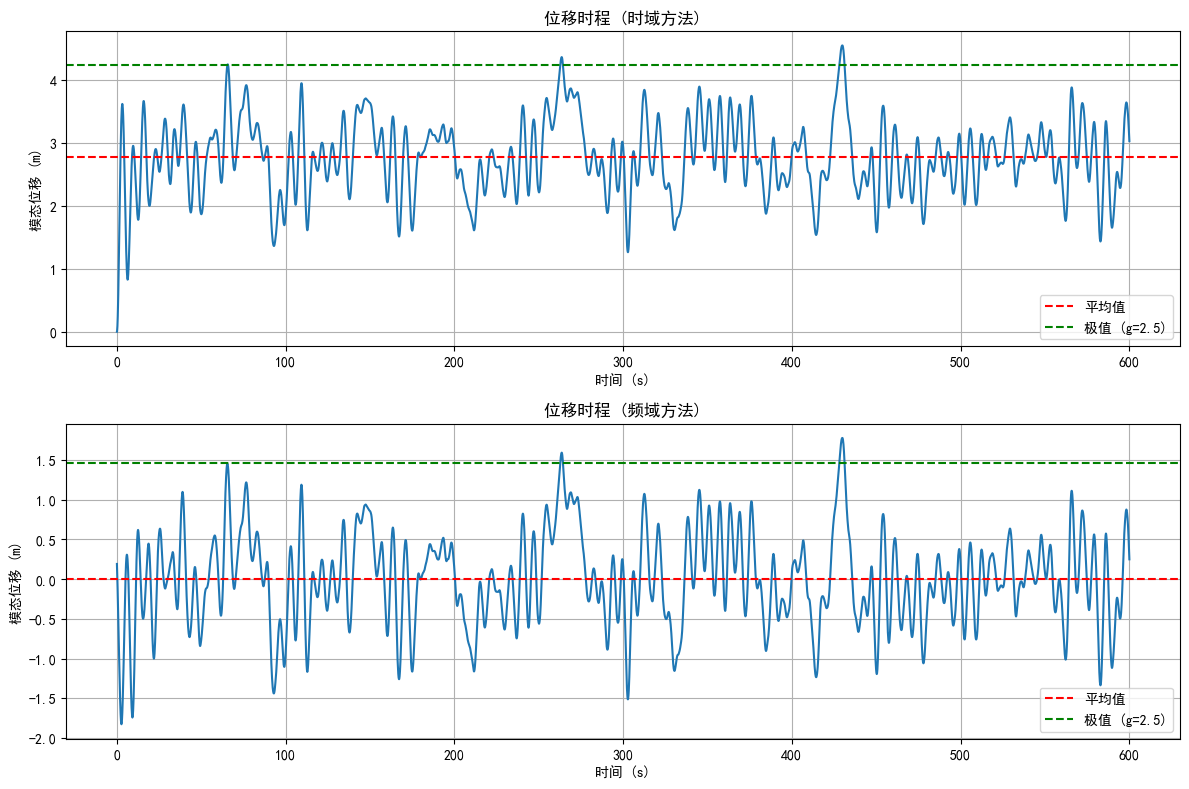

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

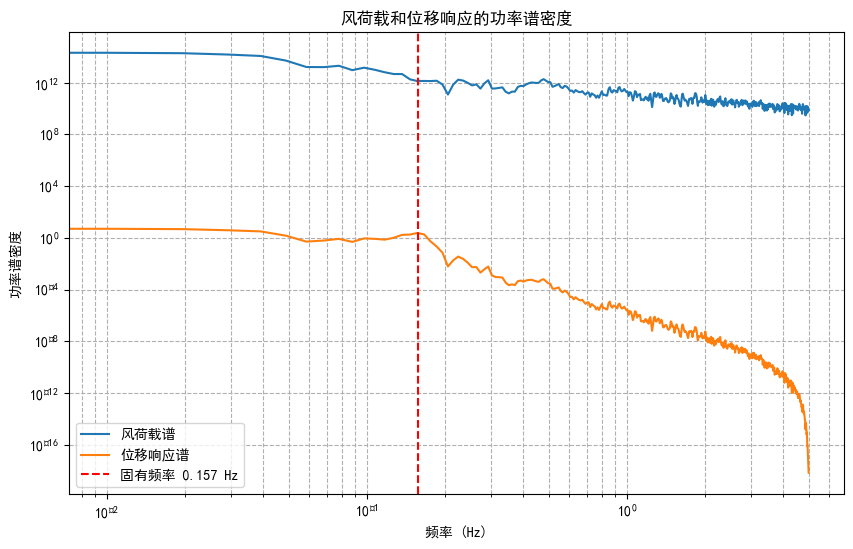

静力位移: 2.773488 m
动力位移 (时域): 1.469315 m
总位移极值 (时域): 4.242802 m
动力位移 (频域): 1.458369 m
总位移极值 (频域): 4.231856 m


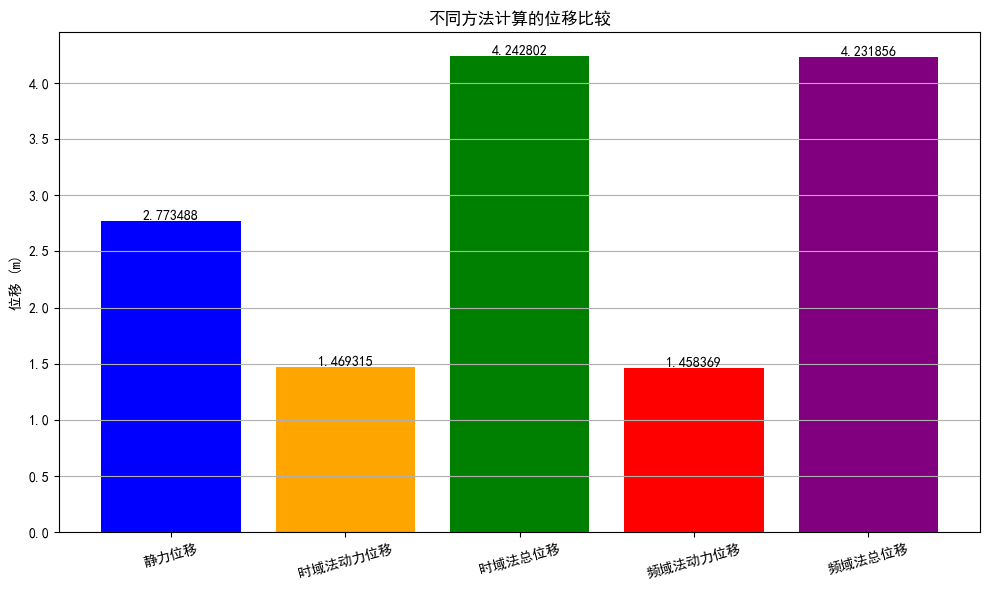

In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, integrate
from scipy.fft import fft, ifft, fftfreq

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# load data
simDataPath = 'D:/windData/windData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
Z = simData['Z']
dt = simData['dt']
t = simData['t']
del simData
print("\n风速数据维度:", U.shape)

# ---------- 结构与风场基本参数 ----------
# 结构参数
building_height = 324.95  # 建筑总高 (m)
building_width = 65.88    # 迎风面宽度 (m)
building_depth = 35.50    # 建筑宽度 (m)
period_1 = 6.38           # 第一阶自振周期 (s)
damping_ratio = 0.05      # 阻尼比

# 顶部圆柱参数
d_lower = 23.5  # 下部圆柱直径 (m)
h_lower = 6.49  # 下部圆柱高度 (m)
d_upper = 12.0  # 上部圆柱直径 (m)
h_upper = 15.0  # 上部圆柱高度 (m)

# 风场参数 (C类地形)
basic_wind_pressure = 0.75  # 基本风压 (kN/m²)
shape_coef = 1.4            # 体型系数（矩形截面）
peak_factor = 2.5           # 峰值因子
turbulence_intensity = 0.23 # C类地形10m高度湍流强度
terrain_factor_k = 0.295    # C类地形参数k
terrain_exponent = 0.261    # C类地形指数α1
fluctuating_wind_coef = 0.54 # C类地形脉动风参数kw

# 模态和质量分布
h_ratio = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
mode_shape = np.array([0.0000, 0.0137, 0.0558, 0.1277, 0.2424, 0.3503, 0.4629, 0.5903, 0.7309, 0.8700, 1.0000])
mass = np.array([2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 1500]) * 1000  # 转换为kg

# 计算各高度
heights = h_ratio * building_height

# 使用时域和频域方法计算风荷载下的顶部位移极值
def calculate_displacement_by_simulation():
    rho = 1.25  # 空气密度 (kg/m³)
    
    # 计算各高度处的平均风速和脉动风速
    mean_wind = np.mean(U, axis=1)
    fluct_wind = U - mean_wind[:, np.newaxis]
    
    # 插值得到模态形状和质量在测点高度上的值
    mode_shape_interp = np.interp(Z, heights, mode_shape)
    
    # 计算各高度处的面积
    areas = np.zeros_like(Z)
    for i in range(len(Z)):
        height_level = Z[i] / building_height
        
        if height_level < 0.93:  # 主体部分
            if i == 0:
                areas[i] = Z[i] * building_width
            else:
                areas[i] = (Z[i] - Z[i-1]) * building_width
        else:
            # 顶部圆柱体部分
            if height_level < 0.95:  # 下部圆柱
                if i == 0:
                    areas[i] = Z[i] * d_lower
                else:
                    areas[i] = (Z[i] - Z[i-1]) * d_lower
            else:  # 上部圆柱
                if i == 0:
                    areas[i] = Z[i] * d_upper
                else:
                    areas[i] = (Z[i] - Z[i-1]) * d_upper
    
    # 计算风荷载时程
    # F_i(t) = [1/2*rho*u_i^2 + rho*u_i*u'_i(t)] * mu_s * A_i
    # 修复：确保 F_static 的形状与 F_dynamic 兼容
    mean_wind_2d = mean_wind[:, np.newaxis]  # 形状变为 (11,1)
    F_static = 0.5 * rho * mean_wind_2d**2 * shape_coef * areas[:, np.newaxis]  # 形状为 (11,1)
    F_dynamic = rho * mean_wind_2d * fluct_wind * shape_coef * areas[:, np.newaxis]  # 形状为 (11,6000)
    F_total = F_static + F_dynamic  # 广播后形状为 (11,6000)
    
    # 计算广义风荷载时程
    F_gen = np.zeros(len(t))
    for i in range(len(Z)):
        F_gen += F_total[i, :] * mode_shape_interp[i]
    
    # 计算固有频率和振动特性
    natural_freq = 1 / period_1  # Hz
    circular_freq = 2 * np.pi * natural_freq  # rad/s
    
    # 计算模态质量和刚度
    modal_mass = np.sum(mass[1:] * mode_shape[1:]**2)  # 不包括地面点
    modal_stiffness = modal_mass * circular_freq**2  # N/m
    
    # 计算阻尼系数
    modal_damping = 2 * damping_ratio * np.sqrt(modal_mass * modal_stiffness)  # N·s/m
    
    # 时域方法 - Newmark-β算法
    def newmark_beta(F, dt, m, c, k, beta=0.25, gamma=0.5):
        n = len(F)
        x = np.zeros(n)
        v = np.zeros(n)
        a = np.zeros(n)
        
        # 初始条件
        x[0] = 0
        v[0] = 0
        a[0] = (F[0] - c * v[0] - k * x[0]) / m
        
        # Newmark-β迭代
        for i in range(1, n):
            # 预测步
            x_pred = x[i-1] + dt*v[i-1] + 0.5*dt**2*a[i-1]
            v_pred = v[i-1] + dt*a[i-1]
            
            # 修正步
            a[i] = (F[i] - c*v_pred - k*x_pred) / m
            x[i] = x_pred + beta*dt**2*(a[i] - a[i-1])
            v[i] = v_pred + gamma*dt*(a[i] - a[i-1])
        
        return x, v, a
    
    # 使用Newmark-β算法计算位移时程
    x_time, v_time, a_time = newmark_beta(F_gen, dt, modal_mass, modal_damping, modal_stiffness)
    
    # 频域方法 - 响应谱分析
    def frequency_domain_analysis(F, dt, m, c, k):
        n = len(F)
        
        # 计算FFT
        F_fft = fft(F)
        freq = fftfreq(n, dt)
        
        # 计算频率响应函数 (仅计算正频率部分)
        pos_freq_idx = np.where(freq > 0)
        omega = 2 * np.pi * freq
        
        # 初始化频率响应函数
        H = np.zeros(len(freq), dtype=complex)
        
        # 计算频响函数 H(ω) = 1/[k - mω² + jcω]
        for idx in pos_freq_idx[0]:
            H[idx] = 1.0 / complex(k - m * omega[idx]**2, c * omega[idx])
        
        # 负频率部分取共轭
        for i in range(1, n//2):
            H[n-i] = np.conj(H[i])
        
        # 计算位移的FFT
        X_fft = F_fft * H
        
        # 计算位移时程
        x = np.real(ifft(X_fft))
        
        # 返回位移和频率
        return x, freq
    
    # 使用频域方法计算位移时程
    x_freq, freq = frequency_domain_analysis(F_gen, dt, modal_mass, modal_damping, modal_stiffness)
    
    # 计算静力部分位移
    F_gen_mean = np.mean(F_gen)
    x_static = F_gen_mean / modal_stiffness
    
    # 计算动力响应 (使用峰值因子)
    # 时域法
    x_std_time = np.std(x_time)
    x_dynamic_time = peak_factor * x_std_time
    x_total_time = x_static + x_dynamic_time
    
    # 频域法
    x_std_freq = np.std(x_freq)
    x_dynamic_freq = peak_factor * x_std_freq
    x_total_freq = x_static + x_dynamic_freq
    
    # 顶部位移（与模态形状相乘）
    top_disp_static = x_static * mode_shape[-1]
    top_disp_dynamic_time = x_dynamic_time * mode_shape[-1]
    top_disp_total_time = x_total_time * mode_shape[-1]
    top_disp_dynamic_freq = x_dynamic_freq * mode_shape[-1]
    top_disp_total_freq = x_total_freq * mode_shape[-1]
    
    # 绘制位移时程
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, x_time)
    plt.axhline(y=np.mean(x_time), color='r', linestyle='--', label='平均值')
    plt.axhline(y=np.mean(x_time) + peak_factor*x_std_time, color='g', linestyle='--', label=f'极值 (g={peak_factor})')
    plt.title('位移时程 (时域方法)')
    plt.xlabel('时间 (s)')
    plt.ylabel('模态位移 (m)')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(t, x_freq)
    plt.axhline(y=np.mean(x_freq), color='r', linestyle='--', label='平均值')
    plt.axhline(y=np.mean(x_freq) + peak_factor*x_std_freq, color='g', linestyle='--', label=f'极值 (g={peak_factor})')
    plt.title('位移时程 (频域方法)')
    plt.xlabel('时间 (s)')
    plt.ylabel('模态位移 (m)')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 绘制功率谱密度
    plt.figure(figsize=(10, 6))
    
    # 计算风荷载功率谱
    f, psd_force = signal.welch(F_gen, fs=1/dt, nperseg=1024, noverlap=512)
    
    # 计算位移响应功率谱
    f, psd_disp = signal.welch(x_time, fs=1/dt, nperseg=1024, noverlap=512)
    
    plt.loglog(f, psd_force, label='风荷载谱')
    plt.loglog(f, psd_disp, label='位移响应谱')
    plt.axvline(x=natural_freq, color='r', linestyle='--', label=f'固有频率 {natural_freq:.3f} Hz')
    
    plt.xlabel('频率 (Hz)')
    plt.ylabel('功率谱密度')
    plt.title('风荷载和位移响应的功率谱密度')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
    
    return top_disp_static, top_disp_dynamic_time, top_disp_total_time, top_disp_dynamic_freq, top_disp_total_freq

# 执行计算
print("\n=== 使用时域和频域方法计算 ===")
x_static_sim, x_dynamic_time, x_total_time, x_dynamic_freq, x_total_freq = calculate_displacement_by_simulation()
print(f"静力位移: {x_static_sim:.6f} m")
print(f"动力位移 (时域): {x_dynamic_time:.6f} m")
print(f"总位移极值 (时域): {x_total_time:.6f} m")
print(f"动力位移 (频域): {x_dynamic_freq:.6f} m")
print(f"总位移极值 (频域): {x_total_freq:.6f} m")

# 结果比较
plt.figure(figsize=(10, 6))
methods = ['静力位移', '时域法动力位移', '时域法总位移', '频域法动力位移', '频域法总位移']
values = [x_static_sim, x_dynamic_time, x_total_time, x_dynamic_freq, x_total_freq]

plt.bar(methods, values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('位移 (m)')
plt.title('不同方法计算的位移比较')
plt.xticks(rotation=15)
plt.grid(True, axis='y')

# 在柱状图上标注数值
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.6f}", ha='center')

plt.tight_layout()
plt.show()